In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np

In [2]:
# Loading the 'movie metada' dataset
movie_metadata = pd.read_csv('/content/drive/MyDrive/NLP/movie_metadata.tsv',sep='\t',header=None)

In [3]:
# Loading the 'plot summaries' dataset
plot_summary = pd.read_csv('/content/drive/MyDrive/NLP/plot_summaries.tsv',sep='\t',header=None)

In [4]:
# Explore the dataset
movie_metadata.head()

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [5]:
movie_metadata.shape

(81741, 9)

In [6]:
movie_metadata.dtypes

0      int64
1     object
2     object
3     object
4    float64
5    float64
6     object
7     object
8     object
dtype: object

In [7]:
plot_summary.head()

,0,1
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [10]:
plot_summary.shape


(42303, 2)

In [11]:
movie_metadata.shape

(81741, 9)

In [12]:
plot_summary.dtypes

0     int64
1    object
dtype: object

In [16]:
# data cleaning
# Renaming the required columns
movie_metadata.columns = ['movie_id', 1, 'movie_name', 3, 4, 5, 6, 7, 'genre']

In [17]:
movie_metadata.head()

,movie_id,1,movie_name,3,4,5,6,7,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [14]:
# Renaming the required columns
plot_summary.columns = ['movie_id', 'plot']

In [18]:
plot_summary.head()

,movie_id,plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [19]:
# Merging both dataframes
df = pd.merge(movie_metadata[['movie_id', 'movie_name', 'genre']], plot_summary, on='movie_id')

In [20]:
df.shape

(42204, 4)

In [21]:
df.head()

,movie_id,movie_name,genre,plot
0,975900,Ghosts of Mars,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th..."
1,9363483,White Of The Eye,"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",A series of murders of rich young women throug...
2,261236,A Woman in Flames,"{""/m/07s9rl0"": ""Drama""}","Eva, an upper class housewife, becomes frustra..."
3,18998739,The Sorcerer's Apprentice,"{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...","Every hundred years, the evil Morgana returns..."
4,6631279,Little city,"{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...","Adam, a San Francisco-based artist who works a..."


In [22]:
# Cleaning the genre column
df['genre'][0]

'{"/m/01jfsb": "Thriller", "/m/06n90": "Science Fiction", "/m/03npn": "Horror", "/m/03k9fj": "Adventure", "/m/0fdjb": "Supernatural", "/m/02kdv5l": "Action", "/m/09zvmj": "Space western"}'

In [23]:
import json
json.loads(df['genre'][0]).values()

dict_values(['Thriller', 'Science Fiction', 'Horror', 'Adventure', 'Supernatural', 'Action', 'Space western'])

In [25]:
df['genre'] = df['genre'].apply(lambda x: list(json.loads(x).values()))


In [26]:
df.head()

,movie_id,movie_name,genre,plot
0,975900,Ghosts of Mars,"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th..."
1,9363483,White Of The Eye,"[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...
2,261236,A Woman in Flames,[Drama],"Eva, an upper class housewife, becomes frustra..."
3,18998739,The Sorcerer's Apprentice,"[Family Film, Fantasy, Adventure, World cinema]","Every hundred years, the evil Morgana returns..."
4,6631279,Little city,"[Romantic comedy, Ensemble Film, Comedy-drama,...","Adam, a San Francisco-based artist who works a..."


In [28]:
df.shape

(41793, 4)

In [27]:
# Remove rows with 0 genre tags
print('Before removing the rows: {}'.format(df.shape))
df = df[df['genre'].apply(lambda x: False if len(x) == 0 else True)]
print('After removing the rows: {}'.format(df.shape))

Before removing the rows: (42204, 4)
After removing the rows: (41793, 4)


# Data Visualization
Different types of genre

In [29]:
# Importing essential libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df.shape[0]
df.iloc[0, 2]

['Thriller',
 'Science Fiction',
 'Horror',
 'Adventure',
 'Supernatural',
 'Action',
 'Space western']

In [32]:
df.head()

,movie_id,movie_name,genre,plot
0,975900,Ghosts of Mars,"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th..."
1,9363483,White Of The Eye,"[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...
2,261236,A Woman in Flames,[Drama],"Eva, an upper class housewife, becomes frustra..."
3,18998739,The Sorcerer's Apprentice,"[Family Film, Fantasy, Adventure, World cinema]","Every hundred years, the evil Morgana returns..."
4,6631279,Little city,"[Romantic comedy, Ensemble Film, Comedy-drama,...","Adam, a San Francisco-based artist who works a..."


In [39]:
# Calculatin unique genre
all_genres = list()
temp = list()

def total_unique_genre(x):
    global all_genre, temp
    x = x.reset_index()
    for i in range(0, x.shape[0]):
        temp = temp + x.iloc[i, 1]
    all_genre = set(temp)
    return len(all_genre)

print('Total number of unique genres are: {}'.format(total_unique_genre(df['genre'])))

Total number of unique genres are: 363


In [44]:
df['genre'].reset_index()

,index,genre
0,0,"[Thriller, Science Fiction, Horror, Adventure,..."
1,1,"[Thriller, Erotic thriller, Psychological thri..."
2,2,[Drama]
3,3,"[Family Film, Fantasy, Adventure, World cinema]"
4,4,"[Romantic comedy, Ensemble Film, Comedy-drama,..."
...,...,...
41788,42199,"[Crime Fiction, Thriller, Comedy, Supernatural]"
41789,42200,[Drama]
41790,42201,"[Biographical film, Drama, Documentary]"
41791,42202,"[Science Fiction, Japanese Movies, Adventure, ..."


In [45]:
df['genre']

0        [Thriller, Science Fiction, Horror, Adventure,...
1        [Thriller, Erotic thriller, Psychological thri...
2                                                  [Drama]
3          [Family Film, Fantasy, Adventure, World cinema]
4        [Romantic comedy, Ensemble Film, Comedy-drama,...
                               ...                        
42199      [Crime Fiction, Thriller, Comedy, Supernatural]
42200                                              [Drama]
42201              [Biographical film, Drama, Documentary]
42202    [Science Fiction, Japanese Movies, Adventure, ...
42203                    [Thriller, Horror, Slasher, Teen]
Name: genre, Length: 41793, dtype: object

In [46]:
# Using FreDist to claculate the frequency of all the genre in the dataset
from nltk.probability import FreqDist
temp_with_count = FreqDist(temp)

# Creating a dataframe of genre_count
df_genre_count = pd.DataFrame({'Genre': list(temp_with_count.keys()),
                               'Count': list(temp_with_count.values())})
df_genre_count.head

<bound method NDFrame.head of                                Genre  Count
0                           Thriller   6530
1                    Science Fiction   2339
2                             Horror   4082
3                          Adventure   3248
4                       Supernatural    571
..                               ...    ...
358                 New Queer Cinema      1
359                       Neorealism      1
360  The Netherlands in World War II      2
361           Revisionist Fairy Tale      2
362                    Homoeroticism      1

[363 rows x 2 columns]>

In [47]:
df_genre_count.shape

(363, 2)

In [48]:
df_genre_count.dtypes

Genre    object
Count     int64
dtype: object

In [49]:
df_genre_count

,Genre,Count
0,Thriller,6530
1,Science Fiction,2339
2,Horror,4082
3,Adventure,3248
4,Supernatural,571
...,...,...
358,New Queer Cinema,1
359,Neorealism,1
360,The Netherlands in World War II,2
361,Revisionist Fairy Tale,2


In [50]:
# Plotting the top 50 genres
genre_top_50 = df_genre_count.sort_values(by=['Count'], ascending=False).iloc[0:50, :]
genre_top_50

,Genre,Count
9,Drama,19134
16,Comedy,10467
18,Romance Film,6666
0,Thriller,6530
5,Action,5868
12,World cinema,5153
30,Crime Fiction,4275
2,Horror,4082
43,Black-and-white,3731
29,Indie,3668


Text(0, 0.5, 'Genre')

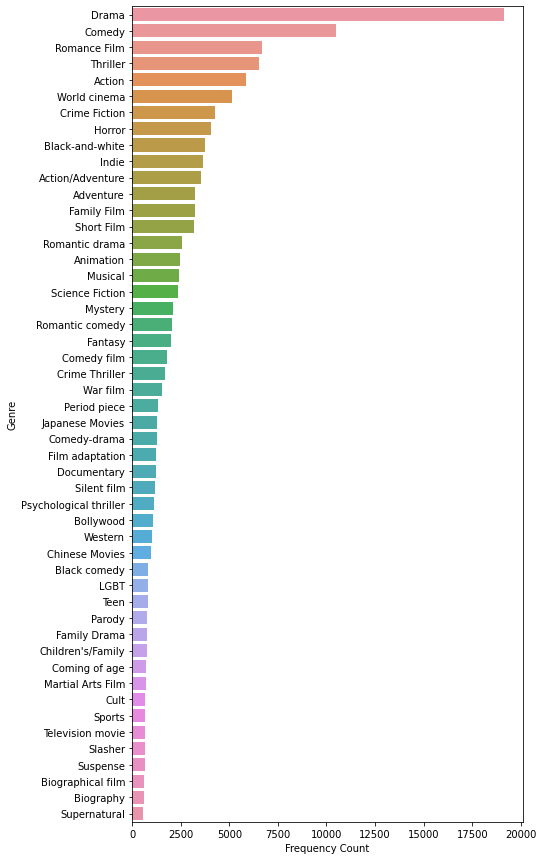

In [51]:
plt.figure(figsize=(7, 15))
sns.barplot(x='Count', y='Genre', data=genre_top_50)
plt.xlabel('Frequency Count')
plt.ylabel('Genre')

# Data Preprocessing


*   Clean plot summary
*   Remove stopwords
*   Stem plot summary
*   Convert Genre into Target variables using MultiLabelBinaries
*   Split dataset into train and test set
*   Create features from coupus using TfidfVectorizer




In [52]:
# Importing essential libraries
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [53]:
def plot_clean(text):
    text = re.sub(pattern='[^a-zA-Z]', repl=' ', string=text)
    text = text.lower()
    text = " ".join(text.split())
    return text

In [56]:
plot_clean(df['plot'][0])

'set in the second half of the nd century the film depicts mars as a planet that has been terraformed allowing humans to walk on the surface without wearing pressure suits the martian society has become largely matriarchal with women in most positions of authority the story concerns a police officer melanie ballard second in command of a small team alongside sergeant jericho sent to pick up and transport a prisoner named desolation williams arriving at the remote mining town where williams is being held ballard finds virtually all of the people missing she learns that the miners had discovered an underground doorway created by an ancient martian civilization when the door was opened it released ghosts disembodied spirits which possessed the miners violence ensues as the possessed miners commit horrific acts of death and destruction as well as self mutilation with their team leader helena bradock murdered ballard must fight off the attacking miners escape the town and destroy the ghosts

In [57]:
df['plot'][0]

'Set in the second half of the 22nd century, the film depicts Mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. The Martian society has become largely matriarchal, with women in most positions of authority. The story concerns a police officer, Melanie Ballard , second in command of a small team alongside Sergeant Jericho  sent to pick up and transport a prisoner named Desolation Williams . Arriving at the remote mining town where Williams is being held, Ballard finds virtually all of the people missing. She learns that the miners had discovered an underground doorway created by an ancient Martian civilization. When the door was opened it released "ghosts," disembodied spirits which possessed the miners. Violence ensues, as the possessed miners commit horrific acts of death and destruction, as well as self-mutilation. With their team leader Helena Bradock  murdered, Ballard must fight off the attacking miners, escape t

In [58]:
df['clean_plot'] = df['plot'].apply(lambda x: plot_clean(x))

In [59]:
df

,movie_id,movie_name,genre,plot,clean_plot
0,975900,Ghosts of Mars,"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th...",set in the second half of the nd century the f...
1,9363483,White Of The Eye,"[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...,a series of murders of rich young women throug...
2,261236,A Woman in Flames,[Drama],"Eva, an upper class housewife, becomes frustra...",eva an upper class housewife becomes frustrate...
3,18998739,The Sorcerer's Apprentice,"[Family Film, Fantasy, Adventure, World cinema]","Every hundred years, the evil Morgana returns...",every hundred years the evil morgana returns t...
4,6631279,Little city,"[Romantic comedy, Ensemble Film, Comedy-drama,...","Adam, a San Francisco-based artist who works a...",adam a san francisco based artist who works as...
...,...,...,...,...,...
42199,23851782,The Ghost Train,"[Crime Fiction, Thriller, Comedy, Supernatural]",{{plot}} The film opens with a Great Western e...,plot the film opens with a great western expre...
42200,35228177,Mermaids: The Body Found,[Drama],Two former National Oceanic Atmospheric Admini...,two former national oceanic atmospheric admini...
42201,34980460,Knuckle,"[Biographical film, Drama, Documentary]",{{No plot}} This film follows 12 years in the ...,no plot this film follows years in the lives o...
42202,913762,The Super Dimension Fortress Macross II: Lover...,"[Science Fiction, Japanese Movies, Adventure, ...","The story takes place in the year 2092,The Sup...",the story takes place in the year the super di...


In [60]:
df[['plot', 'clean_plot']].head()

,plot,clean_plot
0,"Set in the second half of the 22nd century, th...",set in the second half of the nd century the f...
1,A series of murders of rich young women throug...,a series of murders of rich young women throug...
2,"Eva, an upper class housewife, becomes frustra...",eva an upper class housewife becomes frustrate...
3,"Every hundred years, the evil Morgana returns...",every hundred years the evil morgana returns t...
4,"Adam, a San Francisco-based artist who works a...",adam a san francisco based artist who works as...


In [63]:
# Removing the stopwords from 'clean_plot'
stopwords_set = set(stopwords.words('english'))

def plot_stopwords(text):
    words = text.split()
    words = [w for w in words if not w in stopwords_set]
    text = ' '.join(words)
    return text

In [64]:
df['clean_noStopword_plot'] = df['clean_plot'].apply(lambda x: plot_stopwords(x))

In [65]:
df[['clean_plot', 'clean_noStopword_plot']].head()

,clean_plot,clean_noStopword_plot
0,set in the second half of the nd century the f...,set second half nd century film depicts mars p...
1,a series of murders of rich young women throug...,series murders rich young women throughout ari...
2,eva an upper class housewife becomes frustrate...,eva upper class housewife becomes frustrated l...
3,every hundred years the evil morgana returns t...,every hundred years evil morgana returns claim...
4,adam a san francisco based artist who works as...,adam san francisco based artist works cab driv...


In [66]:
# Stemming the words from 'clean_noStopwords_plot'
ps = PorterStemmer()

def plot_stemming(text):
    words = text.split()
    words = [ps.stem(w) for w in words]
    text = ' '.join(words)
    return text

In [67]:
df['clean_noStopword_stem_plot'] = df['clean_noStopword_plot'].apply(lambda x: plot_stemming(x))

In [68]:
df[['clean_noStopword_plot', 'clean_noStopword_stem_plot']].head()

,clean_noStopword_plot,clean_noStopword_stem_plot
0,set second half nd century film depicts mars p...,set second half nd centuri film depict mar pla...
1,series murders rich young women throughout ari...,seri murder rich young women throughout arizon...
2,eva upper class housewife becomes frustrated l...,eva upper class housewif becom frustrat leav a...
3,every hundred years evil morgana returns claim...,everi hundr year evil morgana return claim fin...
4,adam san francisco based artist works cab driv...,adam san francisco base artist work cab driver...


In [70]:
# Convert Genre into Target variables using MultiLabelBinaries
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['genre'])

In [76]:
df['genre']

0        [Thriller, Science Fiction, Horror, Adventure,...
1        [Thriller, Erotic thriller, Psychological thri...
2                                                  [Drama]
3          [Family Film, Fantasy, Adventure, World cinema]
4        [Romantic comedy, Ensemble Film, Comedy-drama,...
                               ...                        
42199      [Crime Fiction, Thriller, Comedy, Supernatural]
42200                                              [Drama]
42201              [Biographical film, Drama, Documentary]
42202    [Science Fiction, Japanese Movies, Adventure, ...
42203                    [Thriller, Horror, Slasher, Teen]
Name: genre, Length: 41793, dtype: object

In [73]:
y.shape

(41793, 363)

In [75]:
y[0].size

363

In [71]:
X = df['clean_noStopword_stem_plot']

In [77]:
X

0        set second half nd centuri film depict mar pla...
1        seri murder rich young women throughout arizon...
2        eva upper class housewif becom frustrat leav a...
3        everi hundr year evil morgana return claim fin...
4        adam san francisco base artist work cab driver...
                               ...                        
42199    plot film open great western express speed box...
42200    two former nation ocean atmospher administr sc...
42201    plot film follow year live irish travel famili...
42202    stori take place year super dimens fortress ma...
42203    movi teenag girl love horror movi watch time y...
Name: clean_noStopword_stem_plot, Length: 41793, dtype: object

In [78]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [81]:
print(X_train, "====", y_train)

22757    plot prepar leav forest moon endor towani fami...
24391    threesom lend reason titl aravindan chandu muk...
3093     vertov start show us intertitl giant cyril cha...
33170    plot veterinari assist corki romano banish fam...
27533    expand section jim fleg book thief forger sell...
                               ...                        
20961    young lotu flower see unconsci man float water...
32426    director produc ivan kral wave filmmak amo poe...
30704    man recent transplant heart lead frantic searc...
21448    one anoth compani carrier pigeon fall prey sed...
2759     famili relat govern land impertin landown inco...
Name: clean_noStopword_stem_plot, Length: 33434, dtype: object ==== [[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [82]:
# Creating independent features using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.8, max_features=10000)
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

# **Model Building**

In [83]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier


In [84]:
lr = LogisticRegression()
ovr_clf = OneVsRestClassifier(lr)

In [85]:
# Fit model on train data
ovr_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 48 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 243 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])


OneVsRestClassifier(estimator=LogisticRegression())

In [87]:
# Predicting values for test set
y_pred_ovr = ovr_clf.predict(X_test)
y_pred_ovr[5]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [88]:
mlb.inverse_transform(y_pred_ovr)[5]

('Drama',)

In [92]:
# Model Evaluation
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred_ovr, average='micro'))

0.324498931732628


In [93]:
print(y_test, '==========================',y_pred_ovr)

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] ========================== [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [94]:
# changing the threshold probability from 0.5 to 0.3
y_pred_prob = ovr_clf.predict_proba(X_test)
y_pred_new = (y_pred_prob >= 0.2).astype(int)

In [95]:
f1_score(y_test, y_pred_new, average='micro')

0.47357308040352586

# **Predictions**

In [96]:
# Creating a function
def predict_genre_tags(text):
    text = plot_clean(text)
    text = plot_stopwords(text)
    text = plot_stemming(text)
    text_vec = tfidf.transform([text])
    text_pred = ovr_clf.predict(text_vec)
    return mlb.inverse_transform(text_pred)

In [102]:
df['plot'][0]

'Set in the second half of the 22nd century, the film depicts Mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. The Martian society has become largely matriarchal, with women in most positions of authority. The story concerns a police officer, Melanie Ballard , second in command of a small team alongside Sergeant Jericho  sent to pick up and transport a prisoner named Desolation Williams . Arriving at the remote mining town where Williams is being held, Ballard finds virtually all of the people missing. She learns that the miners had discovered an underground doorway created by an ancient Martian civilization. When the door was opened it released "ghosts," disembodied spirits which possessed the miners. Violence ensues, as the possessed miners commit horrific acts of death and destruction, as well as self-mutilation. With their team leader Helena Bradock  murdered, Ballard must fight off the attacking miners, escape t

In [103]:
df.shape

(41793, 7)

In [114]:
from numpy.random import randint

In [115]:
for i in randint(0, 41793, 20):
    movie_name = df['movie_name'][i]
    plot_summary = df['plot'][i]
    actual_genre = df['genre'][i]
    predicted_genre = predict_genre_tags(plot_summary)
    print('Movie {}: {}\nPredicted genres: {}\nActual genres: {}\n=============='.format(i, movie_name, predicted_genre, actual_genre))

Movie 40687: Land of the Minotaur
Predicted genres: [()]
Actual genres: ['Horror']
Movie 12960: The Bedroom Window
Predicted genres: [()]
Actual genres: ['Thriller', 'Mystery', 'Psychological thriller', 'Erotic thriller', 'Suspense', 'Crime Thriller']
Movie 41093: A.I. Artificial Intelligence
Predicted genres: [('Science Fiction',)]
Actual genres: ['Drama', 'Science Fiction', 'Future noir', 'Adventure']
Movie 18567: Racing Luck
Predicted genres: [()]
Actual genres: ['Comedy film', 'Adventure']
Movie 10973: Uppalawanna
Predicted genres: [('Drama',)]
Actual genres: ['Drama']
Movie 10271: The Hiding Place
Predicted genres: [('Drama', 'War film')]
Actual genres: ['Christian film', 'Drama', 'Indie', 'War film']
Movie 15009: Alive
Predicted genres: [('Drama',)]
Actual genres: ['Fantasy', 'Drama', 'Mystery']
Movie 29472: Never Ever
Predicted genres: [('Drama', 'Romance Film')]
Actual genres: ['Drama']
Movie 3562: Mixed Doubles
Predicted genres: [()]
Actual genres: ['World cinema', 'Musical', 

In [108]:
df.head()

,movie_id,movie_name,genre,plot,clean_plot,clean_noStopword_plot,clean_noStopword_stem_plot
0,975900,Ghosts of Mars,"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th...",set in the second half of the nd century the f...,set second half nd century film depicts mars p...,set second half nd centuri film depict mar pla...
1,9363483,White Of The Eye,"[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...,a series of murders of rich young women throug...,series murders rich young women throughout ari...,seri murder rich young women throughout arizon...
2,261236,A Woman in Flames,[Drama],"Eva, an upper class housewife, becomes frustra...",eva an upper class housewife becomes frustrate...,eva upper class housewife becomes frustrated l...,eva upper class housewif becom frustrat leav a...
3,18998739,The Sorcerer's Apprentice,"[Family Film, Fantasy, Adventure, World cinema]","Every hundred years, the evil Morgana returns...",every hundred years the evil morgana returns t...,every hundred years evil morgana returns claim...,everi hundr year evil morgana return claim fin...
4,6631279,Little city,"[Romantic comedy, Ensemble Film, Comedy-drama,...","Adam, a San Francisco-based artist who works a...",adam a san francisco based artist who works as...,adam san francisco based artist works cab driv...,adam san francisco base artist work cab driver...
